In [1]:
"""
Content
starwars-episode-N-interactions.json contains the social network extracted from Episode N, where the links between characters are defined by the times the characters speak within the same scene.

starwars-episode-N-mentions.json contains the social network extracted from Episode N, where the links between characters are defined by the times the characters are mentioned within the same scene.

starwars-episode-N-interactions-allCharacters.json is the interactions network with R2-D2 and Chewbacca added in using data from mentions network.

starwars-full-… contain the corresponding social networks for the whole set of 6 episodes.

Nodes

name: Name of the character
value: Number of scenes the character appeared in
colour: Colour in the visualization
Links represent connections between characters

source: zero-based index of the character that is one end of the link, the order of nodes is the order in which they are listed in the “nodes” element
target: zero-based index of the character that is the the other end of the link.
value: Number of scenes where the “source character” and “target character” of the link appeared together.
The network is undirected and which character represents the source and the target is arbitrary, they correspond only to two ends of the link.
"""

'\nContent\nstarwars-episode-N-interactions.json contains the social network extracted from Episode N, where the links between characters are defined by the times the characters speak within the same scene.\n\nstarwars-episode-N-mentions.json contains the social network extracted from Episode N, where the links between characters are defined by the times the characters are mentioned within the same scene.\n\nstarwars-episode-N-interactions-allCharacters.json is the interactions network with R2-D2 and Chewbacca added in using data from mentions network.\n\nstarwars-full-… contain the corresponding social networks for the whole set of 6 episodes.\n\nNodes\n\nname: Name of the character\nvalue: Number of scenes the character appeared in\ncolour: Colour in the visualization\nLinks represent connections between characters\n\nsource: zero-based index of the character that is one end of the link, the order of nodes is the order in which they are listed in the “nodes” element\ntarget: zero-bas

In [2]:
import json
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
import json

file_path = "../datasets/starwar/starwars-full-interactions-allCharacters-merged.json"

with open(file_path) as json_file:
    data = json.load(json_file)

In [4]:
metadata = data['nodes']

In [5]:
edges = data['links']

In [6]:
df_metadata = pd.DataFrame(metadata)
df_metadata.head()

,name,value,colour
0,DARTH VADER,190,#000000
1,R2-D2,171,#bde0f6
2,CHEWBACCA,145,#A0522D
3,BB-8,40,#eb5d00
4,QUI-GON,62,#4f4fb1


In [7]:
df_edges = pd.DataFrame(edges)
df_edges.head()

,source,target,value
0,0,1,32
1,2,0,2
2,0,20,5
3,0,4,22
4,0,18,41


In [122]:
df_metadata.reset_index(inplace = True)
df_metadata.head()

,index,name,value,colour
0,0,DARTH VADER,190,#000000
1,1,R2-D2,171,#bde0f6
2,2,CHEWBACCA,145,#A0522D
3,3,BB-8,40,#eb5d00
4,4,QUI-GON,62,#4f4fb1


In [123]:
df_metadata.rename(columns = {'index' : 'node_id'}, inplace = True)
df_metadata.head()

,node_id,name,value,colour
0,0,DARTH VADER,190,#000000
1,1,R2-D2,171,#bde0f6
2,2,CHEWBACCA,145,#A0522D
3,3,BB-8,40,#eb5d00
4,4,QUI-GON,62,#4f4fb1


In [124]:
# G = nx.from_pandas_edgelist(df_edges, source = 'source', target = 'target', edge_attr = 'value')

In [125]:
nodes_list = list(df_metadata.node_id)

In [126]:
edges_list = list(zip(df_edges.source, df_edges.target))

In [127]:
weight = list(df_edges.value)

In [128]:
# initialize a new graph object
G = nx.Graph()

# populate the graph with nodes
G.add_nodes_from(nodes_list)

# populate the graph with edges
G.add_edges_from(edges_list, edge_attr =df_edges.value)

In [145]:
# plot decoration
# map the color of each node with its community
colors = list(df_metadata.colour)
color_map = []
# loop over nodes in G
for node in G:
    color_map.append(colors[node])

options = {
    'node_color': color_map,
    'node_size': 400,
    'alpha': 1,
    'width': 1,
    'with_labels': True,
    'font_size': 10,
    'font_color': 'white'}

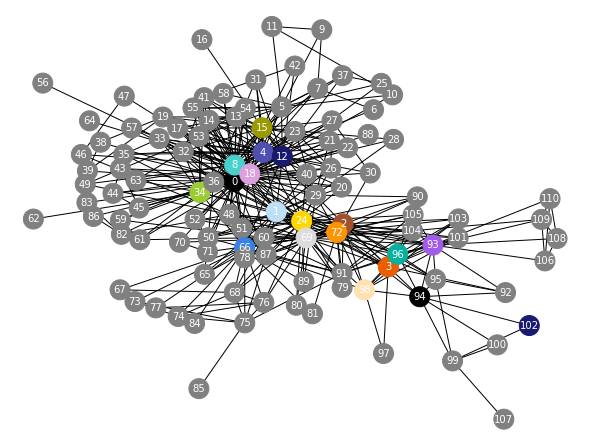

In [162]:
# set graph pattern
pos = nx.kamada_kawai_layout(G)
    
#set graph size
plt.figure(figsize=(8, 6)) 

# draw the network
nx.draw(G, pos, **options)


In [133]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 111
Number of edges: 444
Average degree:   8.0000


In [163]:
df_metadata[df_metadata['node_id']==78]

,node_id,name,value,colour
78,78,GOLD FIVE,9,#808080


In [160]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 20), (0, 4), (0, 18), (0, 21), (0, 15), (0, 22), (0, 23), (0, 24), (0, 26), (0, 27), (0, 8), (0, 29), (0, 30), (0, 13), (0, 19), (0, 32), (0, 33), (0, 34), (0, 35), (0, 17), (0, 38), (0, 39), (0, 40), (0, 14), (0, 43), (0, 44), (0, 45), (0, 50), (0, 51), (0, 52), (0, 54), (0, 55), (0, 5), (0, 53), (0, 57), (0, 12), (0, 58), (0, 36), (0, 63), (0, 69), (0, 70), (0, 71), (0, 82), (0, 83), (0, 86), (0, 48), (0, 87), (0, 72), (0, 66), (0, 88), (1, 2), (1, 3), (1, 8), (1, 18), (1, 4), (1, 20), (1, 24), (1, 26), (1, 29), (1, 12), (1, 40), (1, 51), (1, 50), (1, 36), (1, 34), (1, 66), (1, 69), (1, 65), (1, 68), (1, 72), (1, 87), (2, 3), (2, 8), (2, 24), (2, 66), (2, 72), (2, 29), (2, 69), (2, 79), (2, 87), (2, 48), (2, 96), (2, 98), (2, 101), (2, 103), (2, 93), (2, 94), (2, 95), (3, 93), (3, 92), (3, 98), (3, 97), (3, 96), (3, 72), (3, 101), (3, 103), (3, 69), (3, 24), (4, 5), (4, 7), (4, 8), (4, 15), (4, 17), (4, 14), (4, 13), (4, 18), (4, 19), (4, 20), (4, 21), (